In [5]:
import numpy as np
import pandas as pd

!dir '../input'

Invalid switch - "input'".


In [6]:
data = pd.read_csv('data.csv', encoding='latin-1')

alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)

alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

id_stopword_dict = pd.read_csv('stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})


In [7]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


In [9]:
print("Shape: ", id_stopword_dict.shape)
id_stopword_dict.head(15)

Shape:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
5,agaknya
6,agar
7,akan
8,akankah
9,akhir


In [10]:
data.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

In [11]:
print("Toxic shape: ", data[(data['HS'] == 1) | (data['Abusive'] == 1)].shape)
print("Non-toxic shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Toxic shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


In [61]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("stemming: ", stemming("Saya memakan Indomie dobel Kuah sangat enak sekali"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("kzl bingit nich"))
print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
stemming:  saya makan indomie dobel kuah sangat enak sekali
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  kesal banget nih
remove_stopword:  hehe huhu hehe


In [13]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = stemming(text) # 4
    text = remove_stopword(text) # 5
    return text

In [14]:
data['Tweet'] = data['Tweet'].apply(preprocess)

In [15]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak kawan kawan xf0 x9f x98 x84 xf0...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilih kepala daerah 2018 aman anti h...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0
8,admin belanja po nak makan ais kepal milo ais ...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
import os
import sqlite3
import pandas as pd

In [17]:
# Input data base

conn = sqlite3.connect('db_CC4.db')
print("Opened database successfully")

conn.execute('''CREATE TABLE tweet2 (source varchar(255));''')


print("Table tweet2 created successfully")
conn.commit()
print("Records created successfully")
conn.close()

Opened database successfully


OperationalError: table tweet2 already exists

In [64]:
conn = sqlite3.connect('db_CC4.db')
cur = conn.cursor()
print("Opened database successfully")

rows = []
for sc in data['Tweet']:
  c = (sc)
  rows.append(c)

#print (rows)

cur.executemany(''' INSERT INTO tweet2 (source) VALUES (?)''', zip(rows))
#print ('data entered')

conn.commit()
if (conn):
  conn.close()
  print ('conn closed')

Opened database successfully
conn closed


In [21]:
sql_data = 'db_CC4.db'
conn = sqlite3.connect(sql_data)

df_new=pd.read_sql("SELECT * FROM tweet2",conn)

,source
0,cowok usaha lacak perhati gue lantas remeh per...
1,telat tau edan sarap gue gaul cigax jifla cal ...
2,41 kadang pikir percaya tuhan jatuh kali kali ...
3,ku tau mata sipit lihat
4,kaum cebong kafir lihat dongok dungu haha
...,...
13164,bicara ndasmu congor sekata anjing
13165,kasur enak kunyuk
13166,hati hati bisu bosan duh xf0 x9f x98 xaa
13167,bom real mudah deteksi bom kubur dahsyat ledak...


****NLTK****

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

factory = StopWordRemoverFactory()
list_stopword = factory.get_stop_words()
len(list_stopword)

print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dicosuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


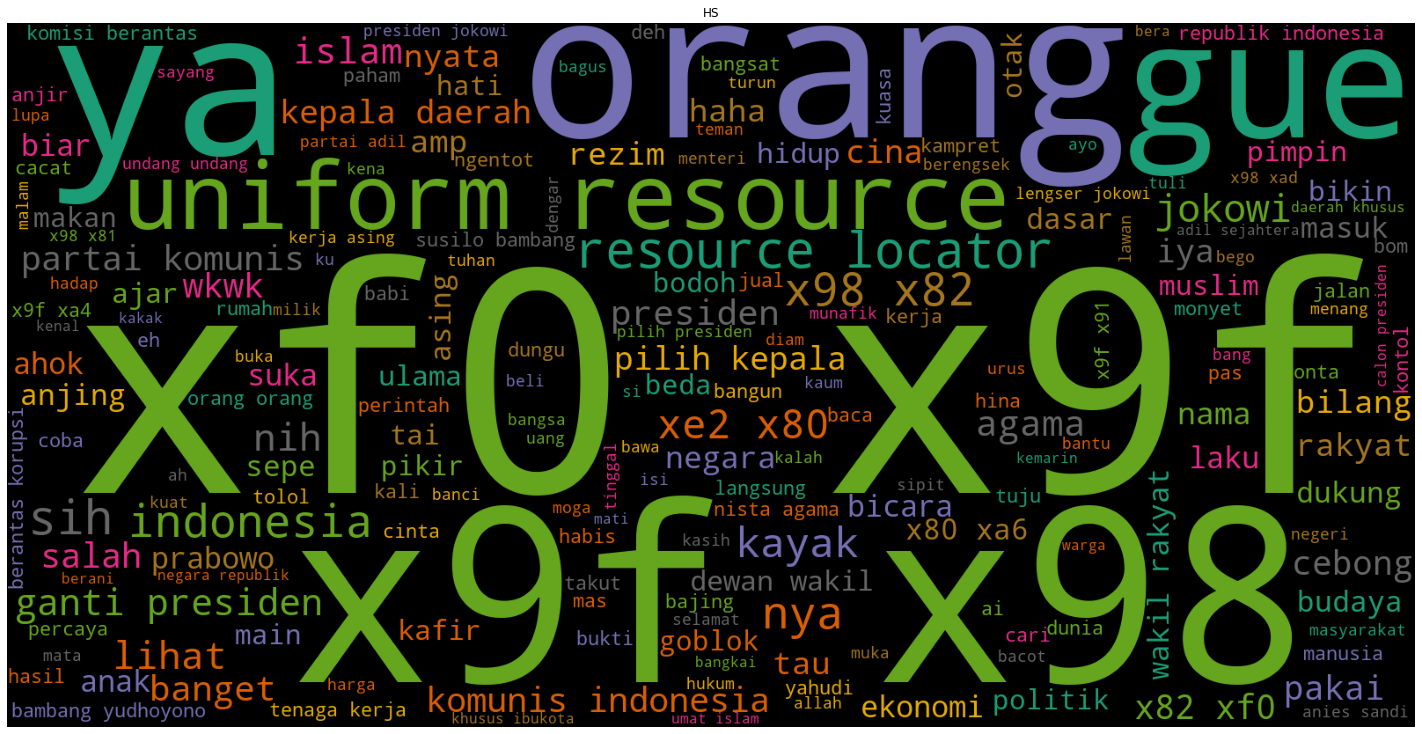

In [68]:
#data_ =(data['Tweet'])
word_ = pd.Series(' '.join(data['Tweet']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('HS')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [69]:
#Data Visual
import seaborn as sns

from matplotlib import pyplot as plt
from plotly import graph_objs as go
%matplotlib inline

import plotly.express as px


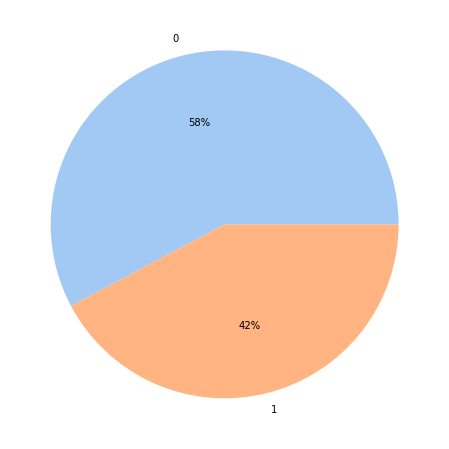

In [108]:
# Pie Plot

colors = sns.color_palette('pastel')
plt.figure(figsize=(30,8))
plt.pie(data['HS'].value_counts(), labels = data['HS'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.show()

In [44]:
print("Shape: ", data.shape)
data.head(5 )

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1,0,1,1,0,0,0,0,0,1,0


In [72]:
fig = go.Figure(go.Funnelarea(
    vs1 =data['HS'],
    values = set(data.HS),
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

ValueError: 
    Invalid value of type 'builtins.set' received for the 'values' property of funnelarea
        Received value: {0, 1}

    The 'values' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [82]:
data2 = pd.read_csv('data2.csv', encoding='latin-1')
print("Shape: ", data2.shape)
data2.head(15)


Shape:  (12, 2)


,ï»¿Kategory,Total
0,HS,5561
1,Abusive,5043
2,HS_Individual,3575
3,HS_Group,1986
4,HS_Religion,793
5,HS_Race,566
6,HS_Physical,323
7,HS_Gender,306
8,HS_Other,3740
9,HS_Weak,3383


In [122]:
vis1 = data2.groupby('ï»¿Kategory')['Total'].mean()
fig = px.bar(vis1,y=vis1.index, x=vis1, color=vis1.index, text_auto='.3s', 
            title="Kategori HS")
fig.show()

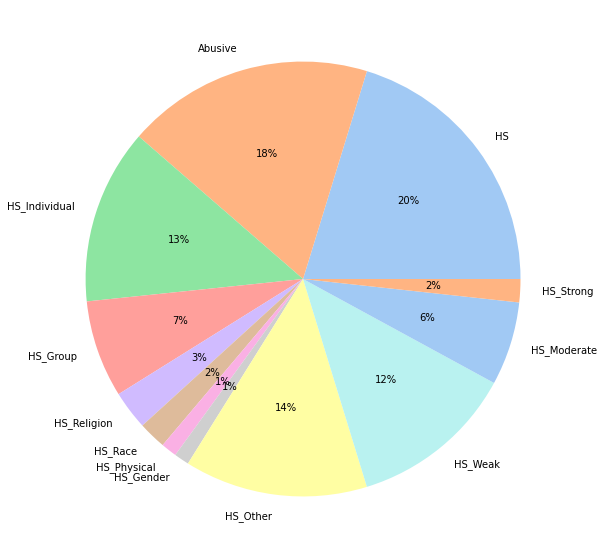

In [126]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(50,10))
plt.pie(data2['Total'], labels = data2['ï»¿Kategory'], colors = colors, autopct='%.0f%%',)
plt.show()

In [ ]:
fig = {
    'data': [
      {
          'values': pie1_list,
          'labels': labels,
          'domain': {'x': [0, 0.5]},
          'name': 'number of students rate',
          'hoverinfo': 'label+percent+name',
          'hole': 0.3,
          'type': 'pie'
      },],
    'layout': {
        'title': 'universities number of students rates',
        'annotations': [
            {'font': {'size':20},
             'showarrow': False,
             'text': 'number of students',
              'x': 0.20,
              'y': 1 },
        ]
    }
}
iplot(fig)